### Import data and libraries

In [979]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import ANN_pkg_2
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score

### DATA PREPARATION 

In [980]:
df = pd.read_excel('mtnd.xlsx').values
# df.head(5)

In [981]:
df.shape

(162, 35)

In [982]:
X = df[:, 4:]
y = df[:, 1:4]
#Scale concentration columns
y = y / 10

In [983]:
np.mean(y, axis=0)

array([1.52691358, 1.57777778, 1.34222222])

#### Train test split

In [984]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [985]:
# Run standardization on X variables
from sklearn.preprocessing import scale 
X_train_scaled, X_test_scaled = scale(X_train), scale(X_test)

___
### Principal Components Regression

#### Evaluate for different number of principal components

In [986]:
rmse_list = []
R2_list = []

In [987]:
# First generate all the principal components
pca = PCA()
X_train_pc = pca.fit_transform(X_train_scaled)
X_train_pc.shape

(129, 31)

In [988]:
# View first 5 rows of all principal components
pd.DataFrame(pca.components_.T).loc[:2,:]

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-0.161106,0.330797,-0.326935,-0.486897,-0.151130,0.119350,-0.142854,0.239412,0.057006,-0.184004,...,-0.018465,0.055361,-0.030406,-0.010044,0.019278,-0.023576,0.090819,-0.005862,0.020718,0.005703
1,-0.166587,0.301001,-0.277475,-0.272572,-0.060239,0.066941,-0.007926,0.019863,-0.019579,0.565564,...,-0.011721,0.082841,-0.003358,-0.043661,-0.006329,0.049049,-0.081773,0.051602,0.036354,0.011754
2,-0.171623,0.268154,-0.224052,-0.085860,0.043268,0.059660,0.063906,-0.028104,-0.013635,-0.316649,...,0.033349,-0.057389,0.022163,0.053027,0.009568,-0.019890,-0.042240,0.019418,-0.092942,0.003750


In [989]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)

In [990]:
# Loop through different count of principal components for linear regression
for i in range(1, X_train_pc.shape[1]+1):
    # rmse_score = -1 * cross_val_score(lin_reg, 
    #                                   X_train_pc[:,:i], # Use first k principal components
    #                                   y_train, 
    #                                   cv=cv, 
    #                                   scoring='neg_mean_squared_error').mean()
    # rmse_list.append(rmse_score)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_pc[:, :i], y_train)
    y_pred = lin_reg.predict(X_train_pc[:, :i])
    rmse_list.append(np.sqrt(np.sum(np.square(y_pred - y_train), axis=0) / y_train.shape[0]))
    R2_list.append(r2_score(y_train, y_pred))

In [991]:
rmse_list=np.array(rmse_list)
R2_list = np.array(R2_list).reshape(-1,1)
rmse_list.shape

(31, 3)

In [992]:
R2_list[6:,:].shape

(25, 1)

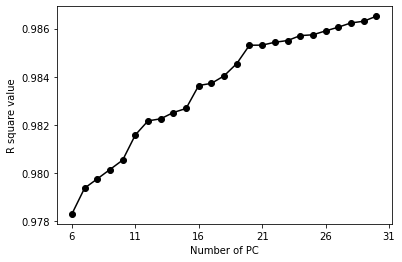

In [993]:
plt.plot(np.arange(6,31),R2_list[6:,:], "-o", color = "black")
plt.xticks(np.arange(6,32, 5))
plt.xlabel("Number of PC")
plt.ylabel("R square value")
plt.show()

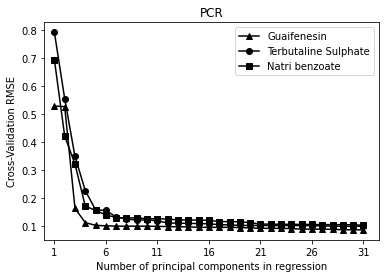

In [994]:
# Plot RMSE vs count of principal components used
plt.plot(rmse_list[:,0], '-^', label='Guaifenesin', color='black')
plt.plot(rmse_list[:,1], '-o', label='Terbutaline Sulphate', color='black')
plt.plot(rmse_list[:,2], '-s', label='Natri benzoate', color='black')
plt.xlabel('Number of principal components in regression')
plt.ylabel('Cross-Validation RMSE')
plt.title('PCR')
plt.xlim(xmin=-1)
plt.xticks(np.arange(X_train_pc.shape[1], step=5), np.arange(1, X_train_pc.shape[1]+1, step=5))
plt.legend()
plt.show()

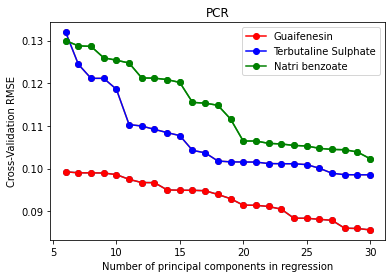

In [995]:
# Plot RMSE vs count of principal components used
plt.plot(np.arange(6, 31),rmse_list[6:,:], '-o')
plt.plot(np.arange(6, 31),rmse_list[6:,0], '-o', label='Guaifenesin', color='red')
plt.plot(np.arange(6, 31),rmse_list[6:,1], '-o', label='Terbutaline Sulphate', color='blue')
plt.plot(np.arange(6, 31),rmse_list[6:,2], '-o', label='Natri benzoate', color='Green')
plt.xlabel('Number of principal components in regression')
plt.ylabel('Cross-Validation RMSE')
plt.title('PCR')
# plt.xticks(np.arange(6, 31, step=5))
plt.legend()
# plt.xticks(np.arange(X_train_pc.shape[1] - 6), np.arange(1, X_train_pc.shape[1] - 6))
plt.show()

In [996]:
rmse_list = rmse_list.mean(axis=1)

In [997]:
(value,min_index) = min((v,i) for i,v in enumerate(list(rmse_list)))
value, min_index

(0.095504861796733, 30)

In [998]:
# Visually determine optimal number of principal components
best_pc_num = min_index + 1

#### Predict

In [999]:
# Train model on training set
lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], y_train)

In [1000]:
X_train_pc[:,:best_pc_num+1].shape

(129, 31)

In [1001]:
print(X_train_pc.shape, y_train.shape)

(129, 31) (129, 3)


In [1002]:
# R2 score
lin_reg_pc.score(X_train_pc[:,:best_pc_num], y_train)

0.9865089488591052

In [1003]:
X_test_scaled.shape

(33, 31)

In [1004]:
best_pc_num

31

In [1005]:
# Get principal components of test set
pca = PCA()
X_test_pc = pca.fit_transform(X_test_scaled)[:,:best_pc_num]
X_test_pc.shape


(33, 31)

In [1006]:
# Predict on test data
PCR_preds = lin_reg_pc.predict(X_test_pc)
pcr_score_test = np.sqrt(np.sum(np.square(PCR_preds - y_test), axis=0) / y_train.shape[0])
pcr_score_test.mean()

0.4283085390575095

In [1007]:
PCR_preds.shape

(33, 3)

In [1008]:
# preds = lin_reg_pc.predict(X_train_pc)
# pcr_score_train = np.sqrt(np.sum(np.square(preds - y_test), axis=0) / y_train.shape[0])
# pcr_score_train.mean()

In [1009]:
mauthuoc = pd.read_excel("mauthuoc.xlsx")
mauthuoc = scale(mauthuoc.iloc[:,1:].values)
mauthuoc = pca.fit_transform(mauthuoc)
# lin_reg_pc.predict(mauthuoc)
mauthuoc.shape

(11, 11)

## ANN IMPLEMENT

In [1010]:
X_train, X_val, y_train, y_val = train_test_split(X_train_pc, y_train, test_size=0.1, random_state=42)
# X_train_scaled = scale(X_train).T
# X_val_scaled = scale(X_val).T
# X_test_scaled = scale(X_test).T
X_train = X_train.T
X_test = X_test_pc.T
X_val = X_val.T
y_train = y_train.T
y_test = y_test.T
y_val = y_val.T

In [1011]:
# model = ANN_pkg_2.Neural_Network([X_train.shape[0],8, 8,y_train.shape[0]], ANN_pkg_2.ReLU, weights, bias)
model = ANN_pkg_2.Neural_Network([X_train.shape[0],10, 10,y_train.shape[0]], ANN_pkg_2.ReLU)

In [1012]:
epochs = 230000

In [1013]:
model.fit(X_train, y_train, X_test, y_test, learning_rate = 0.001, alpha = 0.000005, epochs = epochs, lr_down=True, lr_decay=100)


Loading 10.0%
Loading 20.0%
Loading 30.0%
Loading 40.0%
Loading 50.0%
Loading 60.0%
Loading 70.0%
Loading 80.0%
Loading 90.0%
Loading 100.0%
Learning process completed!!!


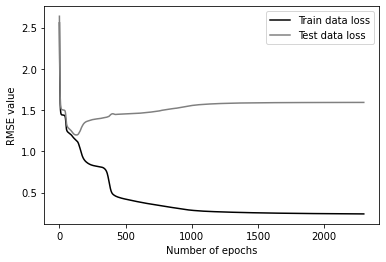

In [1014]:
plt.plot(np.sqrt(model.cost_his), label = "Train data loss", color = "black")
plt.plot(np.sqrt(model.test_cost_his), label = "Test data loss", color = "gray")
# plt.xticks(np.arange(epo))
plt.xlabel("Number of epochs")  
plt.ylabel("RMSE value")
plt.legend(loc="upper right")

In [1015]:
print(np.sqrt(model.cost_his[-1]))
print(np.sqrt(model.test_cost_his[-1]))

0.24088761578959417
1.5931221105298015


In [1016]:
X_test.shape

(31, 33)

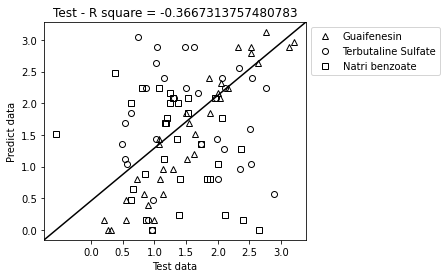

In [1017]:
ANN_pred = model.forward(X_test)
plt.plot(ANN_pred[0,:].T, y_test[0,:].T, "^", label = "Guaifenesin", color = "black", fillstyle='none')
plt.plot(ANN_pred[1,:].T, y_test[1,:].T, "o", label = "Terbutaline Sulfate", color = "black", fillstyle='none')
plt.plot(ANN_pred[2,:].T, y_test[2,:].T, "s", label = "Natri benzoate", color = "black", fillstyle='none')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Test data")
plt.ylabel("Predict data")
plt.xticks(np.arange(3.5, step=0.5))
plt.yticks(np.arange(3.5, step=0.5))
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color = "black")
plt.title(f"Test - R square = {r2_score(y_test.T, ANN_pred.T)}")
plt.show()

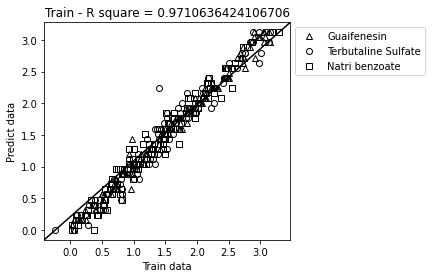

In [1018]:
y_pred = model.forward(X_train)
# y_train.shape
plt.plot(y_pred[0,:].T, y_train[0,:].T, "^", label = "Guaifenesin", color = "black", fillstyle='none')
plt.plot(y_pred[1,:].T, y_train[1,:].T, "o", label = "Terbutaline Sulfate", color = "black", fillstyle='none')
plt.plot(y_pred[2,:].T, y_train[2,:].T, "s", label = "Natri benzoate", color = "black", fillstyle='none')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Train data")
plt.ylabel("Predict data")
plt.xticks(np.arange(3.5, step=0.5))
plt.yticks(np.arange(3.5, step=0.5))
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color = "black")
plt.title(f"Train - R square = {r2_score(y_train.T, y_pred.T)}")
plt.show()

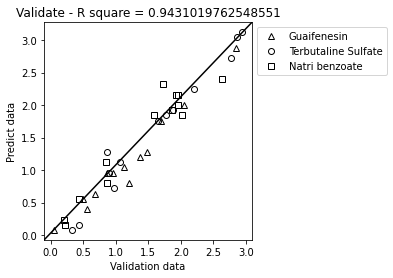

In [1019]:
y_pred = model.forward(X_val)
# y_train.shape
plt.plot(y_pred[0,:].T, y_val[0,:].T, "^", label = "Guaifenesin", color = "black", fillstyle='none')
plt.plot(y_pred[1,:].T, y_val[1,:].T, "o", label = "Terbutaline Sulfate", color = "black", fillstyle='none')
plt.plot(y_pred[2,:].T, y_val[2,:].T, "s", label = "Natri benzoate", color = "black", fillstyle='none')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Validation data")
plt.ylabel("Predict data")
plt.xticks(np.arange(3.5, step=0.5))
plt.yticks(np.arange(3.5, step=0.5))
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color = "black")
plt.title(f"Validate - R square = {r2_score(y_val.T, y_pred.T)}")
plt.show()

In [1020]:
mauthuoc = pd.read_excel("mauthuoc.xlsx")
mauthuoc = mauthuoc.iloc[:,1:].values
mauthuoc = mauthuoc.T
mauthuoc.shape

(31, 11)

In [1021]:
model.forward(pca.transform(mauthuoc)).T[:20, :] * 10
# GF: 33.25
# TBS: 0.75
# NaB: 5

ValueError: X has 11 features, but PCA is expecting 31 features as input.

In [ ]:
df = np.concatenate([y_test.T[:20,:]*10, PCR_preds[:20,:]*10, ANN_pred.T[:20,:] * 10],axis=1)
# pd.DataFrame(df).to_excel("Mauthuc2.xlsx")
pd.DataFrame(df)

,0,1,2,3,4,5,6,7,8
0,28.8,14.4,13.6,27.154503,14.223878,14.492896,26.844399,15.310112,13.863695
1,26.4,8.0,22.4,24.888995,8.759628,20.253365,26.694952,7.588084,18.285095
2,4.8,16.8,2.4,6.951401,13.489712,3.433338,8.035935,12.627659,3.675971
3,24.0,5.6,16.8,20.874936,6.340316,18.780720,20.073577,10.815329,21.250360
4,1.6,22.4,22.4,4.174863,17.749897,18.940935,3.991853,17.652900,19.199016
5,29.6,1.6,11.2,27.101543,20.317560,18.451793,26.132631,20.764829,18.471910
6,0.0,13.6,6.4,3.010675,8.823664,6.020386,4.548436,7.176881,6.776904
7,15.2,20.8,17.6,15.529830,15.920628,18.546304,15.206826,18.730206,19.537818
8,31.2,18.4,2.4,28.638177,17.297342,6.999802,27.949234,19.340318,4.652791
9,1.6,11.2,0.0,5.733288,3.387237,-0.077544,6.717855,3.303642,1.471152


In [ ]:
weights = pickle.load( open( 'weights.pkl' , 'rb' ))
bias = pickle.load( open( 'bias.pkl' , 'rb' ))

In [ ]:
model2 = ANN_pkg_2.Neural_Network([X_train.shape[0],8, 8,y_train.shape[0]], ANN_pkg_2.ReLU, weights, bias)

In [ ]:
model2.forward(X_test).T * 10

ValueError: shapes (8,31) and (30,33) not aligned: 31 (dim 1) != 30 (dim 0)